# Prediction using Ussupervised ML (Level-Beginner)
## K-Means Clustring


#h1 This noteBook will walk throgh some of the basics of K-Means Clustring 

## Promblem statement

#h1 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 


## Importing  Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



## Reading the data sets 

In [3]:
# loading and Reading the iris datsset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
## Checking the duplicate and null values 
print(df.isnull().sum(), '\n\ number of dulpicate rows;', df.duplicated().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 
\ number of dulpicate rows; 0


In [8]:
# check unique classes in data set
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

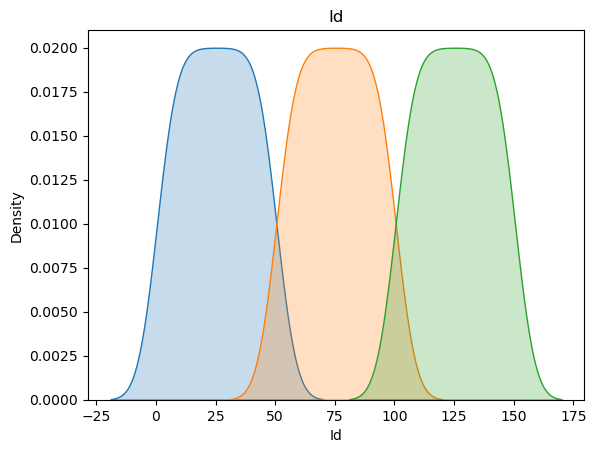

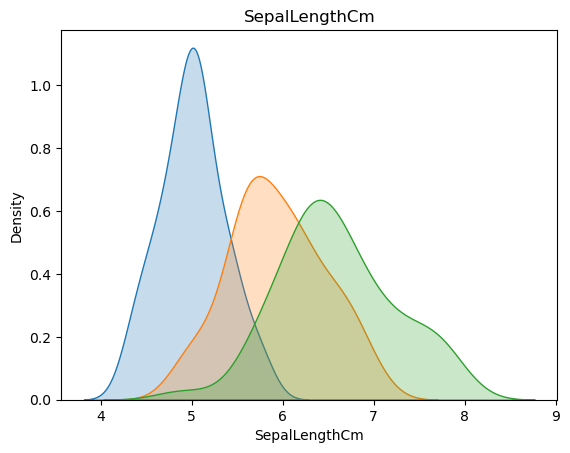

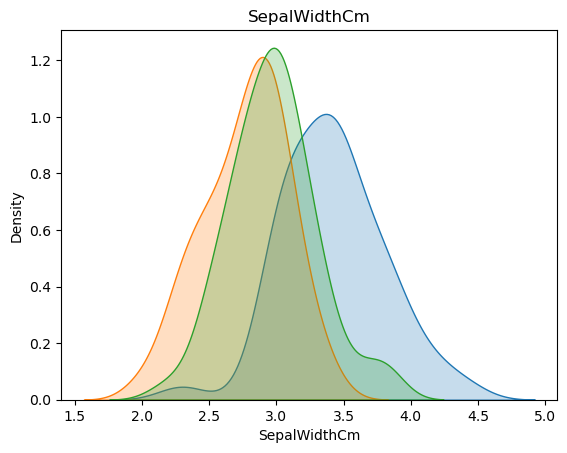

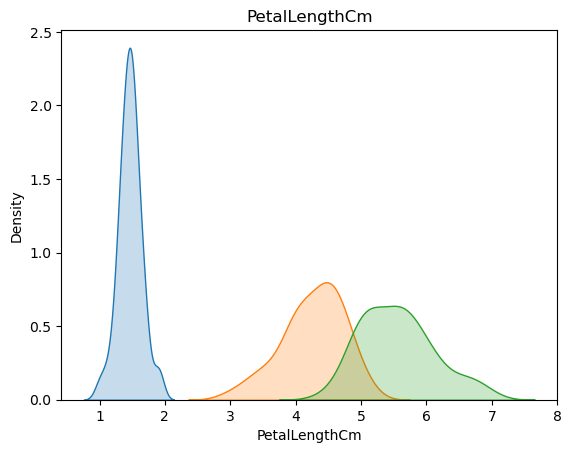

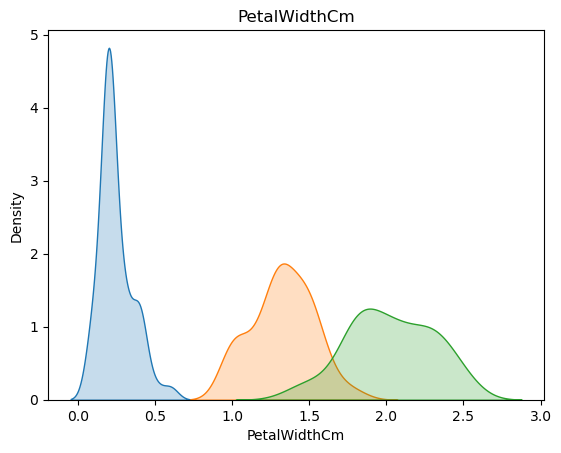

In [9]:
# Distribution of features by Species

for i in df.columns[:-1]:
    sns.kdeplot(data = df.loc[df.Species=='Iris-setosa'][i], label = "Iris-setosa", shade= True)
    sns.kdeplot(data = df.loc[df.Species=='Iris-versicolor'][i], label = 'Iris-versicolor', shade= True)
    sns.kdeplot(data = df.loc[df.Species=='Iris-virginica'][i], label = 'Iris-virginica', shade= True)
    
    plt.title(i)
    plt.show()

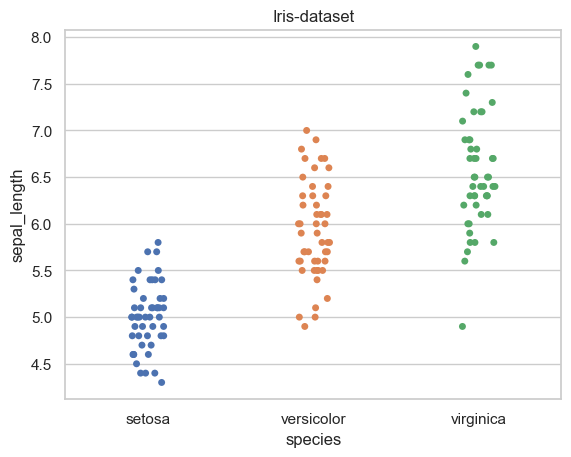

In [11]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris')
ax = sns.stripplot(x = "species", y="sepal_length", data=iris);
plt.title("Iris-dataset")
plt.show()

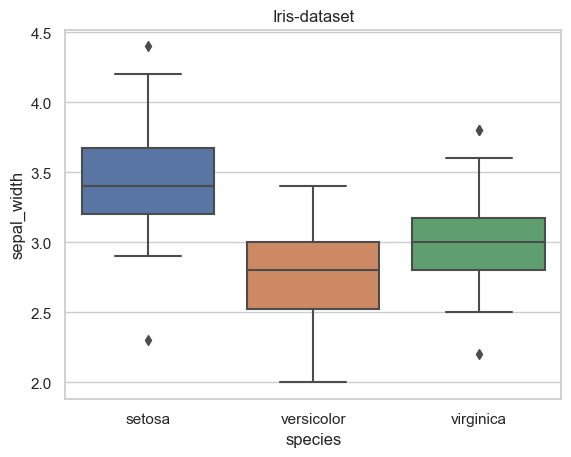

In [12]:
sns.boxplot(x = "species", y="sepal_width", data=iris)
plt.title("Iris-dataset")
plt.show()

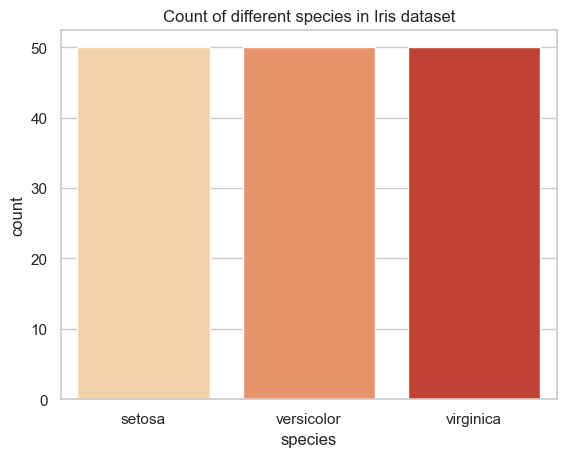

In [13]:
# count plot
sns.countplot(x='species', data=iris, palette='OrRd');
plt.title("Count of different species in Iris dataset")
plt.show()

# Correlation Matrix

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#h1 We can see that after 3 drop in WCSS in minimal So we choose 3 as the optimal number of clusters

# Heat map

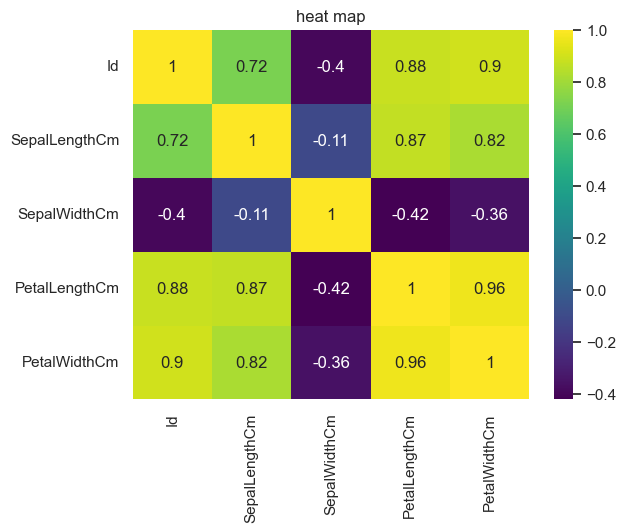

In [15]:
sns.heatmap(df.corr(),annot=True, cmap = 'viridis')
plt.title("heat map")
plt.show()

# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters=k).fit(X)

C:\Users\IMRAN ROSHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


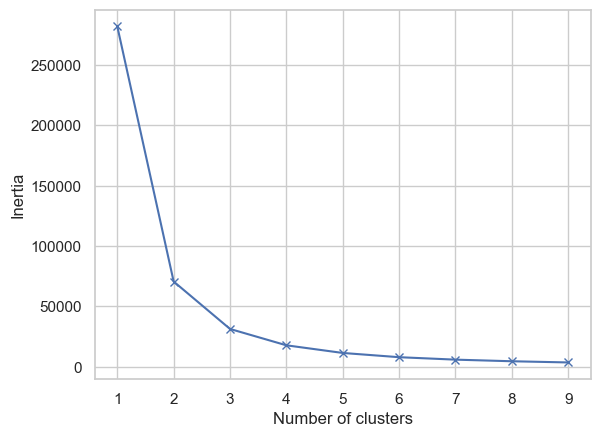

In [16]:
X = df.drop(['Species'], axis=1)  # drop the column 'species' as we are only interested in the feature values

# Try different numbers of clusters
K = range(1, 10)
inertias = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [17]:
# diffs for each cluster
diffs = [inertias[i] - inertias[i - 1] for i in range(1, len(K))]

# find the elbow point
n_clusters = diffs.index(max(diffs)) + 1

print("Optimal number of clusters: ", n_clusters)


Optimal number of clusters:  8


# Optimal number of clusters= 8

In [19]:
# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(X)

In [20]:
# Creating kmeans classifier
kmeans = KMeans(n_clusters=8)

# Fitting the k means algorithm on scaled data
kmeans.fit(X)

# Assign the labels to each point
y_kmeans = kmeans.predict(X)

# Predicting values

In [21]:
y_kmeans

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Visulizing the Clusters

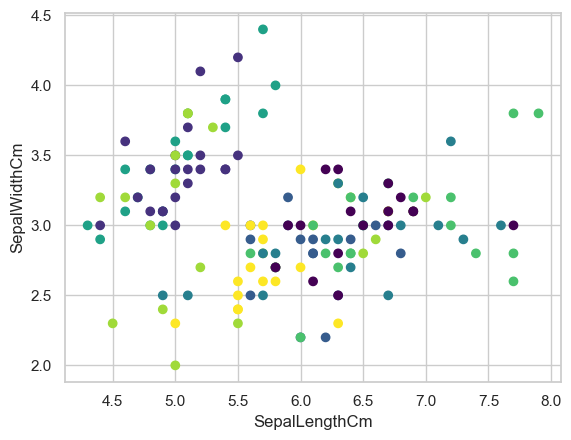

In [22]:

# Append the label to the DataFrame
df['cluster'] = y_kmeans
#Plotting the clusters
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=y_kmeans, cmap='viridis')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()
